In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv -O laptops2.csv

--2024-10-06 11:59:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops2.csv’

laptops2.csv        100%[===================>] 291.58K  --.-KB/s    in 0.02s   

2024-10-06 11:59:05 (14.9 MB/s) - ‘laptops2.csv’ saved [298573/298573]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('laptops2.csv')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [8]:
cols = ['ram', 'storage', 'screen', 'final_price']
df = df[cols]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


(array([ 59., 208., 220., 210., 217., 168., 129., 127.,  94.,  88., 109.,
         73.,  97.,  49.,  36.,  36.,  29.,  28.,  27.,  21.,  23.,   7.,
         12.,  19.,   5.,  20.,  10.,   3.,   6.,   4.,   5.,   3.,   3.,
          3.,   5.,   2.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 201.05  ,  340.0384,  479.0268,  618.0152,  757.0036,  895.992 ,
        1034.9804, 1173.9688, 1312.9572, 1451.9456, 1590.934 , 1729.9224,
        1868.9108, 2007.8992, 2146.8876, 2285.876 , 2424.8644, 2563.8528,
        2702.8412, 2841.8296, 2980.818 , 3119.8064, 3258.7948, 3397.7832,
        3536.7716, 3675.76  , 3814.7484, 3953.7368, 4092.7252, 4231.7136,
        4370.702 , 4509.6904, 4648.6788, 4787.6672, 4926.6556, 5065.644 ,
        5204.6324, 5343.6208, 5482.6092, 5621.5976, 5760.586 , 5899.5744,
        6038.5628, 6177.5512, 6316.5396, 6455.528 , 6594.5164, 6733.5048,
        6872.4932, 7011.4816, 7150.47  ]),
 <BarContainer object o

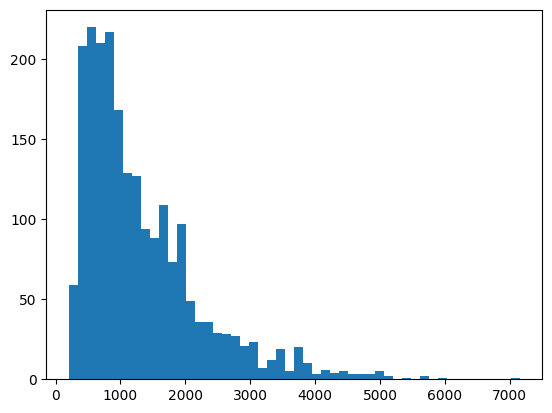

In [9]:
plt.hist(x=df.final_price, bins=50)

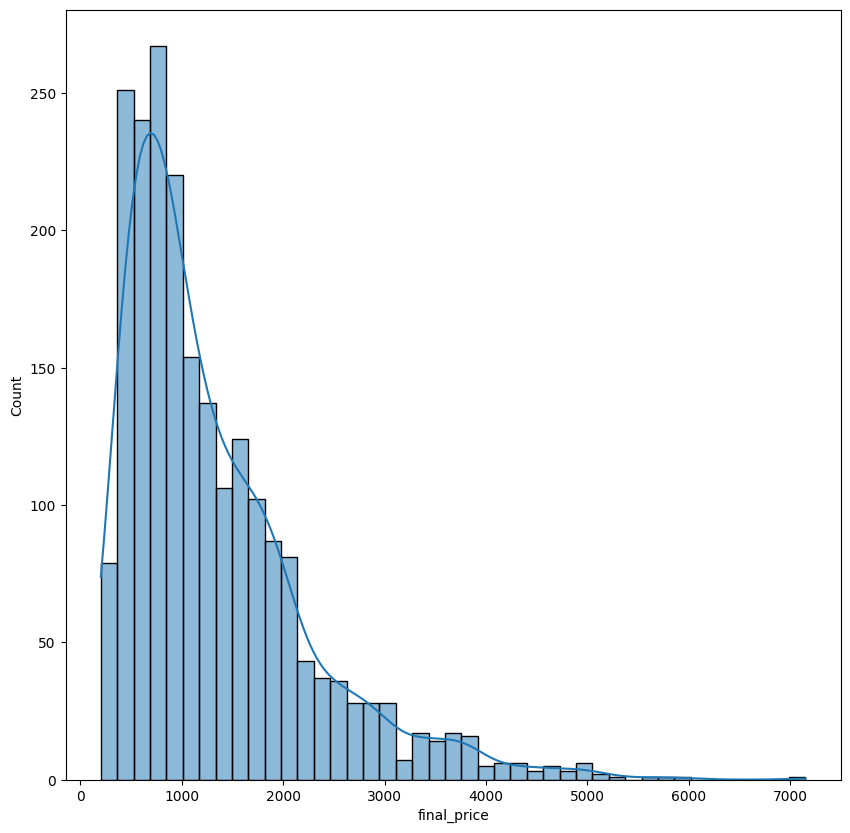

In [10]:
plt.figure(figsize=(10,10))
sns.histplot(df.final_price, kde=True)
plt.show()

# Q.1

In [11]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Ans: screen

# Q.2

In [12]:
df.ram.median()

np.float64(16.0)

### Ans: 16

## Prepare and split the dataset

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [15]:
import numpy as np
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
print(len(df_train), len(df_val), len(df_test))
df_train.head()

1296 432 432


,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


# Q.3

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

len(y_train)

1296

In [19]:
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [20]:
df[df.screen==15.6]

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2149,16,1000,15.6,2899.99
2150,32,1000,15.6,3299.99
2151,32,1000,15.6,3399.99
2152,16,512,15.6,1232.74


In [21]:
def train_linear_regression(X, y, value=0):
    ones = np.ones(X.shape[0])
    X.screen = X.screen.fillna(value)
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [22]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [23]:
w0, w = train_linear_regression(df_train, y_train)
y_pred = w0 + df_val.dot(w)
rmse_with_zero = rmse(y_val, y_pred)
round(rmse_with_zero, 2)

np.float64(596.96)

In [24]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [25]:
value = df.screen.mean()
w0, w = train_linear_regression(df_train, y_train, value)
y_pred = w0 + df_val.dot(w)
rmse_with_mean = rmse(y_val, y_pred)
round(rmse_with_mean, 2)

np.float64(596.96)

## Ans.  Both are equally good

# Q.4

In [26]:
df4 = df.copy()